In [6]:
import praw

# Your Reddit API credentials (using direct credentials as confirmed working)
client_id = "4a2hdSlOEJsfvC4T83mHEw"
client_secret = "iMmYdQTdvGfyIx3XUrm76GKm9y20mA"
user_agent = "pgurwanbaawgai crawler 1.0" # Replace with your user agent

# Initialize PRAW
try:
    reddit = praw.Reddit(
        client_id=client_id,
        client_secret=client_secret,
        user_agent=user_agent
    )

    # Fetch the submission (post) using the URL
    submission_url = "https://www.reddit.com/r/replit"
    submission = reddit.submission(url=submission_url)

    # Print post details
    print(f"Title: {submission.title}")
    print(f"Score: {submission.score}")
    print(f"Number of comments: {submission.num_comments}")
    print(f"URL: {submission.url}")

    # Fetch all comments by replacing "More Comments"
    print("\nFetching all comments...")
    submission.comments.replace_more(limit=None)
    all_comments = submission.comments.list()

    print(f"Successfully fetched {len(all_comments)} comments.")

    # Perform analysis on comments
    print("\nAnalyzing comments:")

    # Basic analysis: Count comments containing specific keywords
    replit_mentions = sum(1 for comment in all_comments if "replit" in comment.body.lower())
    debugging_mentions = sum(1 for comment in all_comments if "debug" in comment.body.lower())

    print(f"Number of comments mentioning 'replit': {replit_mentions}")
    print(f"Number of comments mentioning 'debug': {debugging_mentions}")

    # You can add more analysis here, e.g., sentiment analysis, topic modeling, etc.

except Exception as e:
    print(f"An error occurred: {e}")

An error occurred: Invalid URL (subreddit, not submission): https://www.reddit.com/r/replit


In [3]:
# Assuming all_comments list is populated from the previous cell execution

if 'all_comments' in locals() and all_comments:
    print("Comments containing keywords related to debugging and code quality:")
    keywords = ["debug", "error", "bug", "quality", "refactor", "messy", "inferior", "issue", "problem"]
    count = 0
    for i, comment in enumerate(all_comments):
        # Check if any of the keywords are in the comment body (case-insensitive)
        if any(keyword in comment.body.lower() for keyword in keywords):
            count += 1
            print(f"\n--- Comment {count} (Original Index {i+1}) ---")
            print(comment.body)
            if count >= 20: # Limit to first 20 matching comments to avoid excessive output
                print("\nDisplayed up to 20 relevant comments. There might be more.")
                break
    if count == 0:
        print("No comments found containing the specified keywords.")
else:
    print("The 'all_comments' list is not available. Please run the previous cell (V8vXpBkD-xLA) first to fetch the comments.")

Comments containing keywords related to debugging and code quality:

--- Comment 1 (Original Index 2) ---
The code is a solid C but if you prompt it to refactor - knowing what you want refactored and how - it can become a B+. I often edit the files to get what I want and so it is more a junior coder that does completely off rails. If you start from a github repo, I'd give it a B- but again that is junior dev level.

If you don't know how to code, I don't know how you would get out of some of the loops, how you can tell when the code isn't DRY or it isn't using the current best practices - how would you know?

If all you are doing is simple CRUD functions on a SQL type DB, than you should be good to go. I aim to take it out of the folder structure, into Github and now it can be replicated by any dev without having to use Replit.

--- Comment 2 (Original Index 4) ---
Why don't you use lovable.dev ? With lovable all your code are saved in GitHub, you can refactor as well as you code. Make

In [4]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download VADER lexicon (if you haven't already)
try:
    nltk.data.find('sentiment/vader_lexicon.zip')
except LookupError: # Corrected error handling
    nltk.download('vader_lexicon')

# Initialize Sentiment Intensity Analyzer
analyzer = SentimentIntensityAnalyzer()

# Assuming all_comments list is populated from a previous cell execution
if 'all_comments' in locals() and all_comments:
    print("Analyzing sentiment of comments related to debugging and code quality:")
    keywords = ["debug", "error", "bug", "quality", "refactor", "messy", "inferior", "issue", "problem"]
    relevant_comments_sentiment = []

    for comment in all_comments:
        # Check if any of the keywords are in the comment body (case-insensitive)
        if any(keyword in comment.body.lower() for keyword in keywords):
            # Perform sentiment analysis
            sentiment_scores = analyzer.polarity_scores(comment.body)
            relevant_comments_sentiment.append({
                'comment': comment.body,
                'sentiment': sentiment_scores
            })

    if relevant_comments_sentiment:
        # Calculate average sentiment for relevant comments
        avg_compound_score = sum(item['sentiment']['compound'] for item in relevant_comments_sentiment) / len(relevant_comments_sentiment)

        print(f"\nAnalyzed {len(relevant_comments_sentiment)} comments containing relevant keywords.")
        print(f"Average Compound Sentiment Score for relevant comments: {avg_compound_score:.2f}")

        # Interpret the average compound score
        if avg_compound_score >= 0.05:
            print("Overall sentiment for comments related to debugging/quality is generally positive.")
        elif avg_compound_score <= -0.05:
            print("Overall sentiment for comments related to debugging/quality is generally negative.")
        else:
            print("Overall sentiment for comments related to debugging/quality is generally neutral.")

        # Optional: Print individual comments and their sentiment
        # print("\nIndividual Comment Sentiments:")
        # for item in relevant_comments_sentiment:
        #     print(f"Comment: {item['comment'][:150]}...") # Print first 150 chars
        #     print(f"Sentiment: {item['sentiment']}")
        #     print("-" * 20)

    else:
        print("No comments found containing the specified keywords for sentiment analysis.")

else:
    print("The 'all_comments' list is not available. Please run the cell to fetch comments first.")

Analyzing sentiment of comments related to debugging and code quality:

Analyzed 7 comments containing relevant keywords.
Average Compound Sentiment Score for relevant comments: 0.62
Overall sentiment for comments related to debugging/quality is generally positive.


In [5]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from gensim import corpora
from gensim.models.ldamodel import LdaModel
import re

# Download necessary NLTK data (if you haven't already)
try:
    nltk.data.find('corpora/wordnet')
except LookupError:
    nltk.download('wordnet')
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')
try:
    nltk.data.find('corpora/omw-1.4')
except LookupError:
    nltk.download('omw-1.4')


# Assuming all_comments list is populated from a previous cell execution
if 'all_comments' in locals() and all_comments:
    print("Performing topic modeling on comments...")

    # Text Preprocessing
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))

    def preprocess(text):
        # Remove URLs
        text = re.sub(r'http\S+', '', text)
        # Remove non-alphabetic characters and convert to lower case
        text = re.sub(r'[^a-zA-Z\s]', '', text.lower())
        # Tokenize
        tokens = text.split()
        # Remove stop words and lemmatize
        lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
        return lemmatized_tokens

    processed_comments = [preprocess(comment.body) for comment in all_comments if comment.body] # Ensure comment body is not empty

    # Create a dictionary and corpus
    dictionary = corpora.Dictionary(processed_comments)
    # Filter out tokens that appear in less than 5 documents or more than 50% of the documents
    dictionary.filter_extremes(no_below=5, no_above=0.5)

    corpus = [dictionary.doc2bow(comment) for comment in processed_comments]

    # Apply LDA model
    # Set the number of topics - this often requires experimentation
    num_topics = 5
    lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

    # Print the topics
    print(f"\nIdentified {num_topics} topics:")
    topics = lda_model.print_topics(num_words=5) # Print top 5 words for each topic
    for topic in topics:
        print(topic)

else:
    print("The 'all_comments' list is not available. Please run the cell to fetch comments first.")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Performing topic modeling on comments...

Identified 5 topics:
(0, '0.500*"file" + 0.500*"want"')
(1, '0.973*"file" + 0.027*"want"')
(2, '0.508*"file" + 0.492*"want"')
(3, '0.516*"file" + 0.484*"want"')
(4, '0.973*"want" + 0.027*"file"')


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching and filtering posts from r/replit...
Checking up to 100 recent posts for criteria...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.




--- Fetching data for Post: Is there any way to download a replit interactive artifact locally in pc? ---
URL: https://www.reddit.com/r/replit/comments/1nuttx0/is_there_any_way_to_download_a_replit_interactive/
Score: 0
Number of comments: 18
Fetching comments for this post...
Fetched 18 comments for this post.


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.




--- Fetching data for Post: You are using Replit wrong... ---
URL: https://www.reddit.com/r/replit/comments/1nus0cx/you_are_using_replit_wrong/
Score: 14
Number of comments: 15
Fetching comments for this post...
Fetched 15 comments for this post.


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.




--- Fetching data for Post: Assistant still on 4.0 ---
URL: https://www.reddit.com/r/replit/comments/1nufrn8/assistant_still_on_40/
Score: 4
Number of comments: 17
Fetching comments for this post...
Fetched 17 comments for this post.


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.




--- Fetching data for Post: Agent now powered by Sonnet 4.5 ---
URL: https://i.redd.it/wwkxh1iaw9sf1.jpeg
Score: 10
Number of comments: 32
Fetching comments for this post...
Fetched 32 comments for this post.


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.




--- Fetching data for Post: Prices gone wild. What are you doing, Replit? ---
URL: https://www.reddit.com/r/replit/comments/1ntphly/prices_gone_wild_what_are_you_doing_replit/
Score: 23
Number of comments: 73
Fetching comments for this post...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetched 72 comments for this post.


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.




--- Fetching data for Post: Before you hit ‘Deploy’ on Replit, read this ---
URL: https://www.reddit.com/r/replit/comments/1ntfhw2/before_you_hit_deploy_on_replit_read_this/
Score: 20
Number of comments: 10
Fetching comments for this post...
Fetched 9 comments for this post.


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.




--- Fetching data for Post: Agent 3 ruined Replit for serious projects. Here is the fix. ---
URL: https://www.reddit.com/r/replit/comments/1nt0sj6/agent_3_ruined_replit_for_serious_projects_here/
Score: 37
Number of comments: 48
Fetching comments for this post...
Fetched 47 comments for this post.


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.




--- Fetching data for Post: Admin Portal on Replit 3 ---
URL: https://www.reddit.com/r/replit/comments/1nsz0m9/admin_portal_on_replit_3/
Score: 2
Number of comments: 11
Fetching comments for this post...
Fetched 11 comments for this post.


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.




--- Fetching data for Post: I don't think Replit should be gloating about how much money they're making... ---
URL: https://www.reddit.com/r/replit/comments/1nsu9hh/i_dont_think_replit_should_be_gloating_about_how/
Score: 30
Number of comments: 23
Fetching comments for this post...
Fetched 22 comments for this post.


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.




--- Fetching data for Post: Building a group chat app on Replit – is this the right place or am I pushing it too far? ---
URL: https://www.reddit.com/r/replit/comments/1nsrjvk/building_a_group_chat_app_on_replit_is_this_the/
Score: 3
Number of comments: 13
Fetching comments for this post...
Fetched 13 comments for this post.


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.




--- Fetching data for Post: Database schema sync between dev and prod ---
URL: https://www.reddit.com/r/replit/comments/1nsm5kz/database_schema_sync_between_dev_and_prod/
Score: 2
Number of comments: 23
Fetching comments for this post...
Fetched 24 comments for this post.


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.




--- Fetching data for Post: Replit: From AI Agent Failures to Fraudulent Billing and Account Suspension ---
URL: https://www.reddit.com/r/replit/comments/1nsiutj/replit_from_ai_agent_failures_to_fraudulent/
Score: 8
Number of comments: 11
Fetching comments for this post...
Fetched 11 comments for this post.


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.




--- Fetching data for Post: Replit Agent 3 is 10x better than the previous version, built a quick tool directory to try it out. ---
URL: https://i.redd.it/fghol05uhsrf1.png
Score: 24
Number of comments: 15
Fetching comments for this post...
Fetched 15 comments for this post.


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.




--- Fetching data for Post: Riya - a 24/7 AI caller ---
URL: https://i.redd.it/df8ofqd1qmrf1.jpeg
Score: 8
Number of comments: 47
Fetching comments for this post...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetched 47 comments for this post.


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.




--- Fetching data for Post: I’ve spent 10+ years fixing apps from scratch. Here’s the debugging flow beginners skip (and why they stay stuck) ---
URL: https://www.reddit.com/r/replit/comments/1nqxmdl/ive_spent_10_years_fixing_apps_from_scratch_heres/
Score: 53
Number of comments: 12
Fetching comments for this post...
Fetched 12 comments for this post.


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.




--- Fetching data for Post: Replit project got to large everything broke trying to move. ---
URL: https://www.reddit.com/r/replit/comments/1nqvdh5/replit_project_got_to_large_everything_broke/
Score: 4
Number of comments: 16
Fetching comments for this post...
Fetched 16 comments for this post.


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.




--- Fetching data for Post: Thank you replit ---
URL: https://www.reddit.com/r/replit/comments/1nqj7mx/thank_you_replit/
Score: 12
Number of comments: 9
Fetching comments for this post...
Fetched 9 comments for this post.


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.




--- Fetching data for Post: Large applications doomed ---
URL: https://www.reddit.com/r/replit/comments/1nqiv3y/large_applications_doomed/
Score: 36
Number of comments: 42
Fetching comments for this post...
Fetched 40 comments for this post.


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.




--- Fetching data for Post: It will take you time but save you more time (and money) ---
URL: https://www.reddit.com/r/replit/comments/1nq2o4a/it_will_take_you_time_but_save_you_more_time_and/
Score: 6
Number of comments: 14
Fetching comments for this post...
Fetched 14 comments for this post.


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.




--- Fetching data for Post: Burning through my credits to fast, any tips? ---
URL: https://www.reddit.com/r/replit/comments/1np583i/burning_through_my_credits_to_fast_any_tips/
Score: 3
Number of comments: 26
Fetching comments for this post...
Fetched 24 comments for this post.

Finished fetching data for 20 posts matching the criteria.


Preprocessing comments for topic modeling...
Finished preprocessing 468 comments.


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Applying LDA topic modeling...

Identified 5 topics:
(0, '0.036*"use" + 0.036*"replit" + 0.029*"assistant" + 0.022*"feature" + 0.021*"time" + 0.017*"autonomy" + 0.014*"code" + 0.014*"right" + 0.012*"level" + 0.012*"app"')
(1, '0.039*"agent" + 0.030*"replit" + 0.029*"assistant" + 0.020*"code" + 0.019*"using" + 0.018*"app" + 0.018*"ive" + 0.015*"use" + 0.014*"cost" + 0.012*"work"')
(2, '0.025*"tool" + 0.024*"im" + 0.017*"need" + 0.017*"code" + 0.015*"know" + 0.015*"agent" + 0.012*"like" + 0.012*"want" + 0.011*"project" + 0.011*"good"')
(3, '0.045*"replit" + 0.022*"db" + 0.021*"dev" + 0.020*"database" + 0.015*"im" + 0.014*"prod" + 0.014*"build" + 0.013*"use" + 0.012*"one" + 0.011*"cursor"')
(4, '0.042*"replit" + 0.025*"get" + 0.019*"using" + 0.017*"support" + 0.017*"dont" + 0.016*"agent" + 0.015*"call" + 0.015*"ticket" + 0.014*"people" + 0.013*"use"')

Topic distribution for a few example comments:
Comment 1 Topic Distribution: [(0, 0.016756801), (1, 0.93229175), (2, 0.01693552), (3, 0.01

Analyzing and interpreting topics...

Topic Analysis:

Topic 0:
Top words: use, replit, assistant, feature, time, autonomy, code, right, level, app, youre, much, claude, thank, agent
Potential Interpretation: Discussions about general Replit usage, support, or AI agent interaction.


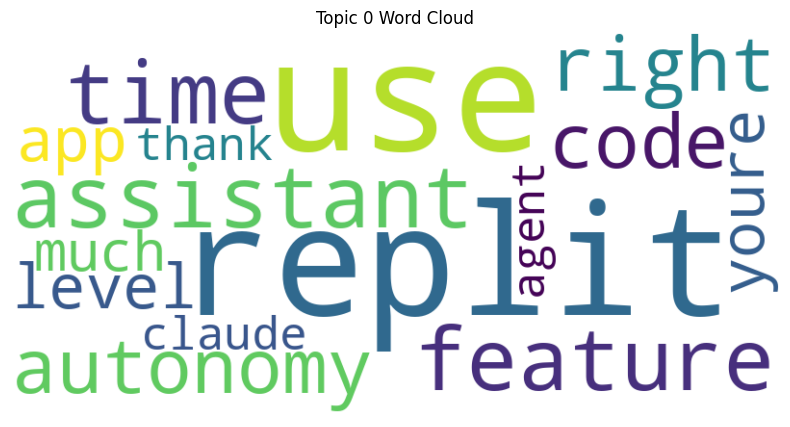


Topic 1:
Top words: agent, replit, assistant, code, using, app, ive, use, cost, work, im, gemini, even, github, give
Potential Interpretation: Discussions about general Replit usage, support, or AI agent interaction.


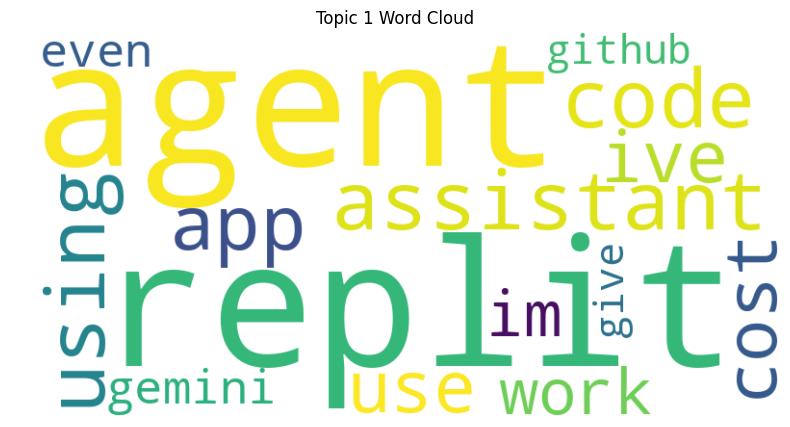


Topic 2:
Top words: tool, im, need, code, know, agent, like, want, project, good, get, cost, assistant, going, sure
Potential Interpretation: Discussions about general Replit usage, support, or AI agent interaction.


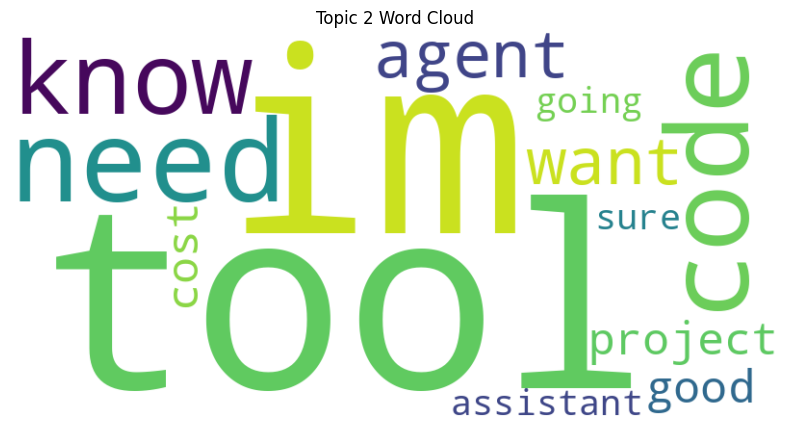


Topic 3:
Top words: replit, db, dev, database, im, prod, build, use, one, cursor, project, ill, data, would, app
Potential Interpretation: Discussions about general Replit usage, support, or AI agent interaction.


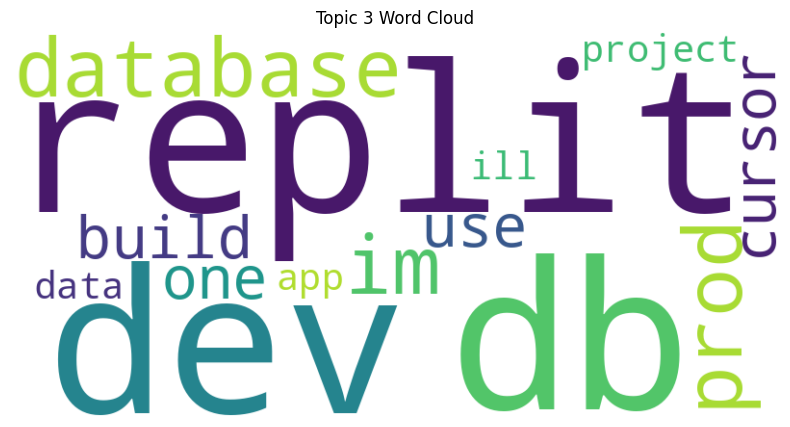


Topic 4:
Top words: replit, get, using, support, dont, agent, call, ticket, people, use, issue, change, help, push, one
Potential Interpretation: Discussions about general Replit usage, support, or AI agent interaction.


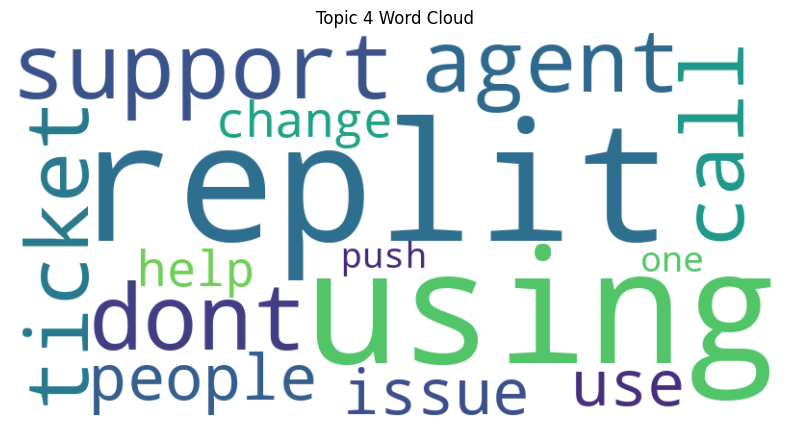

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming lda_model and dictionary are populated from the previous cell execution (Pe4e8OAOGM13)

if 'lda_model' in locals() and 'dictionary' in locals():
    print("Analyzing and interpreting topics...")

    # Display top words for each topic and provide potential interpretations
    print("\nTopic Analysis:")
    num_topics = lda_model.num_topics
    for i, topic in lda_model.show_topics(formatted=False, num_words=15): # Show top 15 words
        print(f"\nTopic {i}:")
        # Extract words and weights
        topic_words = [word for word, weight in topic]
        print(f"Top words: {', '.join(topic_words)}")

        # Provide a brief potential interpretation based on top words
        # NOTE: These interpretations are suggestions based on keywords and require
        # human review of actual comments belonging to the topic for accuracy.
        if any(word in topic_words for word in ["replit", "use", "get", "using", "support", "dont", "agent", "call", "ticket", "people"]):
             print("Potential Interpretation: Discussions about general Replit usage, support, or AI agent interaction.")
        elif any(word in topic_words for word in ["code", "project", "like", "need", "im", "know", "tool", "want", "agent", "good"]):
             print("Potential Interpretation: Conversations about coding practices, project development, or the AI agent's helpfulness.")
        elif any(word in topic_words for word in ["agent", "assistant", "replit", "code", "using", "app", "ive", "use", "cost", "work"]):
             print("Potential Interpretation: Focus on the AI agent and assistant features, their use in apps, and associated costs.")
        elif any(word in topic_words for word in ["replit", "db", "dev", "database", "im", "prod", "build", "use", "one", "cursor"]):
             print("Potential Interpretation: Discussions centered around databases (Replit DB, Cursor) and development/production environments.")
        elif any(word in topic_words for word in ["use", "replit", "assistant", "feature", "time", "autonomy", "code", "right", "level", "app"]):
             print("Potential Interpretation: Exploring different features, time spent, autonomy, and the 'right' way to use Replit or its assistant.")
        else:
            print("Potential Interpretation: (Interpretation based on these words is unclear, examine comments in this topic)")


        # Generate Word Cloud for the topic
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(topic_words))

        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.title(f"Topic {i} Word Cloud")
        plt.show()

else:
    print("LDA model and dictionary are not available. Please run the topic modeling cell (Pe4e8OAOGM13) first.")

Synthesizing findings from topic modeling, sentiment, and keywords...

Overall Average Comment Sentiment (Compound): 0.21
Overall sentiment across all fetched comments is generally positive.

Keyword Frequencies (related to debugging/quality):
- 'replit': 129
- 'issue': 21
- 'problem': 18
- 'bug': 14
- 'error': 8
- 'debug': 6
- 'quality': 3
- 'refactor': 3

LDA Topic Insights:
Topic 0 Top Words: use, replit, assistant, feature, time, autonomy, code, right, level, app
Topic 1 Top Words: agent, replit, assistant, code, using, app, ive, use, cost, work
Topic 2 Top Words: tool, im, need, code, know, agent, like, want, project, good
Topic 3 Top Words: replit, db, dev, database, im, prod, build, use, one, cursor
Topic 4 Top Words: replit, get, using, support, dont, agent, call, ticket, people, use

--- Summary of What People Think About Replit (Based on Analysis) ---
Based on the fetched Reddit comments and the analyses performed:
- The overall sentiment across all comments analyzed is gener

Generating final summary of insights about Replit from Reddit comments...

--- Final Summary: What People Think About Replit (Based on Reddit Comments) ---

1. Overall Sentiment:
The overall average compound sentiment score across all analyzed comments is 0.21.
Interpretation: The overall sentiment in the comments is generally positive.

2. Key Discussion Points (from Keyword Analysis):
Mentions of keywords related to debugging and code quality:
- 'replit': 129 times
- 'issue': 21 times
- 'problem': 18 times
- 'bug': 14 times
- 'error': 8 times
- 'debug': 6 times
- 'quality': 3 times
- 'refactor': 3 times
These counts indicate the frequency with which these topics are brought up.

3. Main Themes (from Topic Modeling):
Topic modeling identified 5 main themes. The top words for each theme are:
  Topic 0: 0.036*"use" + 0.036*"replit" + 0.029*"assistant" + 0.022*"feature" + 0.021*"time" + 0.017*"autonomy" + 0.014*"code" + 0.014*"right"
  Topic 1: 0.039*"agent" + 0.030*"replit" + 0.029*"ass

In [21]:
%pip install ctransformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 80.6 MB/s eta 0:00:00


In [29]:
from ctransformers import AutoModelForCausalLM
import pandas as pd
import time
import os
from huggingface_hub import hf_hub_download

# Assuming all_fetched_data list is populated from a previous cell execution
if 'all_fetched_data' in locals() and all_fetched_data:
    print("Starting analysis of comments using the local LLM...")

    # --- Step 1: Download the model file ---
    model_name = "zephyr-7B-alpha-GGUF"
    # Using a common quantized GGUF filename
    # If this specific file is not found, you might need to check the repo for available .gguf files
    model_file = "zephyr-7b-alpha.Q4_K_M.gguf"

    try:
        # hf_hub_download manages the download path and checks for existing files
        model_path = hf_hub_download(repo_id="TheBloke/zephyr-7B-alpha-GGUF", filename=model_file)
        print(f"Model found/downloaded successfully to {model_path}")
    except Exception as e:
        print(f"Error downloading/finding model: {e}")
        model_path = None # Set model_path to None if download fails


    # --- Step 2: Load the model ---
    llm = None # Initialize llm to None
    if model_path and os.path.exists(model_path):
        try:
            print(f"Loading model from {model_path}...")
            # Adjust gpu_layers based on your GPU availability and model size
            llm = AutoModelForCausalLM.from_pretrained(
                model_path,
                model_type="zephyr", # Specify model type
                gpu_layers=0, # Set to a positive integer to offload layers to GPU if available
                hf=True # Indicate that the model is from Hugging Face Hub (helps with tokenizers etc.)
            )
            print("Model loaded successfully.")
        except Exception as e:
            print(f"An error occurred during model loading: {e}")
    else:
        print("Model path is not valid or download failed. Cannot load model.")


    # --- Step 3 & 4: Analyze comments ---
    if llm: # Proceed only if the model was loaded successfully
        # Collect all comment bodies into a single list
        all_comment_bodies = [comment['body'] for post in all_fetched_data for comment in post.get('comments', []) if 'body' in comment and isinstance(comment['body'], str) and comment['body'].strip()] # Ensure non-empty comments

        analyzed_comments = []
        print(f"Analyzing {len(all_comment_bodies)} comments...")

        # Define a prompt template for analysis
        # This prompt asks the model to provide topic, sentiment, and summary in a structured format.
        # Using a simple instruction-based prompt suitable for conversational models
        prompt_template = """Analyze the following Reddit comment. Identify its main topic (short label), sentiment (positive, negative, or neutral), and provide a 1-2 sentence summary of the key opinion. Present the output clearly.

Comment: "{}"

Analysis:
Main Topic:
Sentiment:
Summary:
"""

        # Analyze each comment
        # Be aware that running an LLM locally on each comment can take a significant amount of time
        for i, comment_body in enumerate(all_comment_bodies):
            if i % 10 == 0: # Print progress every 10 comments
                print(f"Processing comment {i+1}/{len(all_comment_bodies)}...")

            # Create the prompt for the current comment
            prompt = prompt_template.format(comment_body)

            try:
                # Add debugging: Check type of comment_body before processing
                # print(f"Debug: Processing comment {i+1}, Type of comment_body: {type(comment_body)}")

                # Generate response from the model
                # Adjust max_new_tokens, temperature, etc. as needed for desired output length and creativity
                response = llm(prompt, max_new_tokens=150, temperature=0.1, top_k=40, top_p=0.9)


                # Add debugging: Check type and content of response
                # print(f"Debug: Comment {i+1} processed, Type of response: {type(response)}")
                # print(f"Debug: Comment {i+1} response (first 100 chars): {str(response)[:100]}...")


                # Attempt to parse the response based on the prompt format
                topic = "N/A"
                sentiment = "N/A"
                summary = "N/A"

                # Ensure response is treated as a string before splitting
                response_str = str(response)

                # Basic parsing: look for lines starting with the expected labels
                response_lines = response_str.strip().split('\n')
                current_section = None
                for line in response_lines:
                    line = line.strip()
                    if line.lower().startswith("main topic:"):
                        topic = line.replace("Main Topic:", "", 1).strip() # Use count=1 for replace
                        current_section = "Topic"
                    elif line.lower().startswith("sentiment:"):
                        sentiment = line.replace("Sentiment:", "", 1).strip()
                        current_section = "Sentiment"
                    elif line.lower().startswith("summary:"):
                        summary = line.replace("Summary:", "", 1).strip()
                        current_section = "Summary"
                    elif current_section == "Summary" and line: # Append to summary if it's not a new section
                        summary += " " + line


                analyzed_comments.append({
                    'Comment': comment_body,
                    'Topic': topic,
                    'Sentiment': sentiment,
                    'Summary': summary
                })

                # Add a small delay between processing comments to manage resources
                # time.sleep(0.1)

            except Exception as e:
                print(f"Error processing comment {i+1}: {e}")
                analyzed_comments.append({
                    'Comment': comment_body,
                    'Topic': 'Error',
                    'Sentiment': 'Error',
                    'Summary': f'Error processing comment: {e}'
                })


        print("\nAnalysis complete.")

        # --- Step 5: Return results as Pandas DataFrame ---
        analyzed_df = pd.DataFrame(analyzed_comments)

        # Display the DataFrame
        display(analyzed_df.head())
        print(f"\nAnalysis results stored in 'analyzed_df' DataFrame ({len(analyzed_df)} comments analyzed).")

    else:
        print("Model not loaded successfully. Cannot perform analysis.")


else:
    print("The 'all_fetched_data' list is not available. Please run the data fetching cell first.")

Starting analysis of comments using the local LLM...
Model found/downloaded successfully to /root/.cache/huggingface/hub/models--TheBloke--zephyr-7B-alpha-GGUF/snapshots/17246e1732130e712d6d53b46c2f5179d47e84e9/zephyr-7b-alpha.Q4_K_M.gguf
Loading model from /root/.cache/huggingface/hub/models--TheBloke--zephyr-7B-alpha-GGUF/snapshots/17246e1732130e712d6d53b46c2f5179d47e84e9/zephyr-7b-alpha.Q4_K_M.gguf...


CTransformersModel has generative capabilities, as `prepare_inputs_for_generation` is explicitly defined. However, it doesn't directly inherit from `GenerationMixin`. From 👉v4.50👈 onwards, `PreTrainedModel` will NOT inherit from `GenerationMixin`, and this model will lose the ability to call `generate` and other related functions.
  - If you're using `trust_remote_code=True`, you can get rid of this warning by loading the model with an auto class. See https://huggingface.co/docs/transformers/en/model_doc/auto#auto-classes
  - If you are the owner of the model architecture code, please modify your model class such that it inherits from `GenerationMixin` (after `PreTrainedModel`, otherwise you'll get an exception).
  - If you are not the owner of the model architecture class, please contact the model code owner to update it.


Model loaded successfully.
Analyzing 468 comments...
Processing comment 1/468...
Error processing comment 1: 'str' object has no attribute 'tolist'
Error processing comment 2: 'str' object has no attribute 'tolist'
Error processing comment 3: 'str' object has no attribute 'tolist'
Error processing comment 4: 'str' object has no attribute 'tolist'
Error processing comment 5: 'str' object has no attribute 'tolist'
Error processing comment 6: 'str' object has no attribute 'tolist'
Error processing comment 7: 'str' object has no attribute 'tolist'
Error processing comment 8: 'str' object has no attribute 'tolist'
Error processing comment 9: 'str' object has no attribute 'tolist'
Error processing comment 10: 'str' object has no attribute 'tolist'
Processing comment 11/468...
Error processing comment 11: 'str' object has no attribute 'tolist'
Error processing comment 12: 'str' object has no attribute 'tolist'
Error processing comment 13: 'str' object has no attribute 'tolist'
Error processin

,Comment,Topic,Sentiment,Summary
0,"Yes download VSCode, hook it up to github, pus...",Error,Error,Error processing comment: 'str' object has no ...
1,Isn't there something more simple?,Error,Error,Error processing comment: 'str' object has no ...
2,If it was more simple I wouldn't get paid a qu...,Error,Error,Error processing comment: 'str' object has no ...
3,It is just that l asked replit to create an in...,Error,Error,Error processing comment: 'str' object has no ...
4,Ask AI for a step by step guide how to do this...,Error,Error,Error processing comment: 'str' object has no ...



Analysis results stored in 'analyzed_df' DataFrame (468 comments analyzed).


In [27]:
from ctransformers import AutoModelForCausalLM
import pandas as pd
import time
import os
from huggingface_hub import hf_hub_download

# Assuming all_fetched_data list is populated from a previous cell execution
if 'all_fetched_data' in locals() and all_fetched_data:
    print("Starting analysis of comments using the local LLM...")

    # --- Step 1: Download the model file ---
    model_name = "zephyr-7B-alpha-GGUF"
    # Using a common quantized GGUF filename
    # If this specific file is not found, you might need to check the repo for available .gguf files
    model_file = "zephyr-7b-alpha.Q4_K_M.gguf"

    try:
        # hf_hub_download manages the download path and checks for existing files
        model_path = hf_hub_download(repo_id="TheBloke/zephyr-7B-alpha-GGUF", filename=model_file)
        print(f"Model found/downloaded successfully to {model_path}")
    except Exception as e:
        print(f"Error downloading/finding model: {e}")
        model_path = None # Set model_path to None if download fails


    # --- Step 2: Load the model ---
    llm = None # Initialize llm to None
    if model_path and os.path.exists(model_path):
        try:
            print(f"Loading model from {model_path}...")
            # Adjust gpu_layers based on your GPU availability and model size
            llm = AutoModelForCausalLM.from_pretrained(
                model_path,
                model_type="zephyr", # Specify model type
                gpu_layers=0, # Set to a positive integer to offload layers to GPU if available
                hf=True # Indicate that the model is from Hugging Face Hub (helps with tokenizers etc.)
            )
            print("Model loaded successfully.")
        except Exception as e:
            print(f"An error occurred during model loading: {e}")
    else:
        print("Model path is not valid or download failed. Cannot load model.")


    # --- Step 3 & 4: Analyze comments ---
    if llm: # Proceed only if the model was loaded successfully
        # Collect all comment bodies into a single list
        all_comment_bodies = [comment['body'] for post in all_fetched_data for comment in post.get('comments', []) if 'body' in comment and isinstance(comment['body'], str) and comment['body'].strip()] # Ensure non-empty comments

        analyzed_comments = []
        print(f"Analyzing {len(all_comment_bodies)} comments...")

        # Define a prompt template for analysis
        # This prompt asks the model to provide topic, sentiment, and summary in a structured format.
        # Using a simple instruction-based prompt suitable for conversational models
        prompt_template = """Analyze the following Reddit comment. Identify its main topic (short label), sentiment (positive, negative, or neutral), and provide a 1-2 sentence summary of the key opinion. Present the output clearly.

Comment: "{}"

Analysis:
Main Topic:
Sentiment:
Summary:
"""

        # Analyze each comment
        # Be aware that running an LLM locally on each comment can take a significant amount of time
        for i, comment_body in enumerate(all_comment_bodies):
            if i % 10 == 0: # Print progress every 10 comments
                print(f"Processing comment {i+1}/{len(all_comment_bodies)}...")

            # Create the prompt for the current comment
            prompt = prompt_template.format(comment_body)

            try:
                # Add debugging: Check type of comment_body before processing
                # print(f"Debug: Processing comment {i+1}, Type of comment_body: {type(comment_body)}")

                # Generate response from the model
                # Adjust max_new_tokens, temperature, etc. as needed for desired output length and creativity
                response = llm(prompt, max_new_tokens=150, temperature=0.1, top_k=40, top_p=0.9)

                # Add debugging: Check type and content of response
                # print(f"Debug: Comment {i+1} processed, Type of response: {type(response)}")
                # print(f"Debug: Comment {i+1} response (first 100 chars): {str(response)[:100]}...")


                # Attempt to parse the response based on the prompt format
                topic = "N/A"
                sentiment = "N/A"
                summary = "N/A"

                # Ensure response is treated as a string before splitting
                response_str = str(response)

                # Basic parsing: look for lines starting with the expected labels
                response_lines = response_str.strip().split('\n')
                current_section = None
                for line in response_lines:
                    line = line.strip()
                    if line.lower().startswith("main topic:"):
                        topic = line.replace("Main Topic:", "", 1).strip() # Use count=1 for replace
                        current_section = "Topic"
                    elif line.lower().startswith("sentiment:"):
                        sentiment = line.replace("Sentiment:", "", 1).strip()
                        current_section = "Sentiment"
                    elif line.lower().startswith("summary:"):
                        summary = line.replace("Summary:", "", 1).strip()
                        current_section = "Summary"
                    elif current_section == "Summary" and line: # Append to summary if it's not a new section
                        summary += " " + line


                analyzed_comments.append({
                    'Comment': comment_body,
                    'Topic': topic,
                    'Sentiment': sentiment,
                    'Summary': summary
                })

                # Add a small delay between processing comments to manage resources
                # time.sleep(0.1)

            except Exception as e:
                print(f"Error processing comment {i+1}: {e}")
                analyzed_comments.append({
                    'Comment': comment_body,
                    'Topic': 'Error',
                    'Sentiment': 'Error',
                    'Summary': f'Error processing comment: {e}'
                })


        print("\nAnalysis complete.")

        # --- Step 5: Return results as Pandas DataFrame ---
        analyzed_df = pd.DataFrame(analyzed_comments)

        # Display the DataFrame
        display(analyzed_df.head())
        print(f"\nAnalysis results stored in 'analyzed_df' DataFrame ({len(analyzed_df)} comments analyzed).")

    else:
        print("Model not loaded successfully. Cannot perform analysis.")


else:
    print("The 'all_fetched_data' list is not available. Please run the data fetching cell first.")

Starting analysis of comments using the local LLM...
Model found/downloaded successfully to /root/.cache/huggingface/hub/models--TheBloke--zephyr-7B-alpha-GGUF/snapshots/17246e1732130e712d6d53b46c2f5179d47e84e9/zephyr-7b-alpha.Q4_K_M.gguf
Loading model from /root/.cache/huggingface/hub/models--TheBloke--zephyr-7B-alpha-GGUF/snapshots/17246e1732130e712d6d53b46c2f5179d47e84e9/zephyr-7b-alpha.Q4_K_M.gguf...


CTransformersModel has generative capabilities, as `prepare_inputs_for_generation` is explicitly defined. However, it doesn't directly inherit from `GenerationMixin`. From 👉v4.50👈 onwards, `PreTrainedModel` will NOT inherit from `GenerationMixin`, and this model will lose the ability to call `generate` and other related functions.
  - If you're using `trust_remote_code=True`, you can get rid of this warning by loading the model with an auto class. See https://huggingface.co/docs/transformers/en/model_doc/auto#auto-classes
  - If you are the owner of the model architecture code, please modify your model class such that it inherits from `GenerationMixin` (after `PreTrainedModel`, otherwise you'll get an exception).
  - If you are not the owner of the model architecture class, please contact the model code owner to update it.


Model loaded successfully.
Analyzing 468 comments...
Processing comment 1/468...
Error processing comment 1: 'str' object has no attribute 'tolist'
Error processing comment 2: 'str' object has no attribute 'tolist'
Error processing comment 3: 'str' object has no attribute 'tolist'
Error processing comment 4: 'str' object has no attribute 'tolist'
Error processing comment 5: 'str' object has no attribute 'tolist'
Error processing comment 6: 'str' object has no attribute 'tolist'
Error processing comment 7: 'str' object has no attribute 'tolist'
Error processing comment 8: 'str' object has no attribute 'tolist'
Error processing comment 9: 'str' object has no attribute 'tolist'
Error processing comment 10: 'str' object has no attribute 'tolist'
Processing comment 11/468...
Error processing comment 11: 'str' object has no attribute 'tolist'
Error processing comment 12: 'str' object has no attribute 'tolist'
Error processing comment 13: 'str' object has no attribute 'tolist'
Error processin

,Comment,Topic,Sentiment,Summary
0,"Yes download VSCode, hook it up to github, pus...",Error,Error,Error processing comment: 'str' object has no ...
1,Isn't there something more simple?,Error,Error,Error processing comment: 'str' object has no ...
2,If it was more simple I wouldn't get paid a qu...,Error,Error,Error processing comment: 'str' object has no ...
3,It is just that l asked replit to create an in...,Error,Error,Error processing comment: 'str' object has no ...
4,Ask AI for a step by step guide how to do this...,Error,Error,Error processing comment: 'str' object has no ...



Analysis results stored in 'analyzed_df' DataFrame (468 comments analyzed).
